In [227]:
### Meant to test OPO bowtie

In [229]:
%matplotlib inline
import pykat
import pylab as pl
import numpy as np

In [414]:
katcode = '''
l L0 100 0 nlin1
s lbs 1 nlin1 nlin2

sq sqz 0 10 0 nsqzin1
s sqzopo 1 nsqzin1 nsqzin2

bs bsin 0.5 0.5 0 45 nlin2 dump nbs2opo nsqzin2
s bsopo 1 nbs2opo nOPO_ARIC_in

#### Mode matching from OPO
# insert a MMT between the squeezer and the FC so you can separate the modes
s ssqz_lens1 0.1 nOPO_ARICrefl nsqz_lens1a
lens sqz_lens1 inf nsqz_lens1a nsqz_lens1b
s ssqz_lens1_lens2 0.1 nsqz_lens1b nsqz_lens2a
lens sqz_lens2 inf nsqz_lens2a nsqz_lens2b

# Distance lensSqz2 --> ZM1
s lzm1 1.395 nsqz_lens2b nZM1a 

# ZM1
bs1 ZM1 10u $Mloss 0 4.399 nZM1a nZM1b dump dump
attr ZM2 Rc 1.7058

# Distance ZM1 --> ZM2
s lzm2 0.631 nZM1b nZM2a
bs1 ZM2 10u $Mloss 0 30.037 nZM2a nZM2b dump dump

# Distance ZM2 --> OFI 
s lzm2fi 0.196 nZM2b nOFIout2

#OPO (as built parameters: T1600067-v1)
# Input Coupler IC (flat mirror)
bs1 OPO_ARIC 1 0 0 4.004 nOPO_ARIC_in nOPO_ARICrefl nOPO_ARIC_trans nOPO_ARICret
s subOPO_IC 0.01078 $nsilica nOPO_ARIC_trans nOPO_HRIC_in
s subOPO_IOC 0.01078 $nsilica nOPO_HRIC_refl nOPO_ARICret
bs1 OPO_HRIC 0.125 10u 0 6 nOPO_HRIC_in nOPO_HRIC_refl nOPO_HRIC_trans nOPO_HRICret

# Distance from IC to OC 
s OPO_ICOC 0.110 1 nOPO_HRIC_trans nOPO_HROC_in

# Output Coupler OC (flat mirror)
bs1 OPO_HROC 0.0015 10u 0 6 nOPO_HROC_in nOPO_HROC_refl nOPO_HROC_trans nOPO_HROC_ret
s subOPO_OC 0.01078 $nsilica nOPO_HROC_trans nOPO_AROC_in
bs1 OPO_AROC 1 0 0 2.7609 nOPO_AROC_in dump nOPO_AROC_trans dump

# Distance from OC to CM1
s OPO_OCCM1 0.087103 1 nOPO_HROC_refl nOPO_CM1_in

# Curved Mirror CM1
bs1 OPO_CM1 0.01 10u 0 6 nOPO_CM1_in nOPO_CM1_refl dump dump
attr OPO_CM1 Rc 0.050

# Distance from CM1 to CM2 
s OPO_CM1CM2 0.06040 1 nOPO_CM1_refl nOPO_CM2_in

# Curved Mirror CM2
bs1 OPO_CM2 0.01 10u 0 6 nOPO_CM2_in nOPO_CM2_refl dump dump
attr OPO_CM2 Rc 0.050

# Distance from CM2 to IC 
s CM2OPOOC 0.083 1 nOPO_CM2_refl nOPO_HRICret

# Absent crystal makes this cavity unstable
#cav cavOPO OPO_HROC nOPO_HROC_refl OPO_HROC nOPO_HROC_in


cp cavOPO x stability
cp cavOPO y stability

cp cavOPO x q
cp cavOPO y q

cp cavOPO x w0
cp cavOPO y w0

cp cavOPO x fsr
cp cavOPO y fsr

cp cavOPO x fwhm
cp cavOPO y fwhm

cp cavOPO x finesse
cp cavOPO y finesse

const nsilica 1.44963098985906
const Mloss 0

noxaxis
yaxis re:im
'''

#load the original kat file (ie Perfect Modematching) as a reference
basekat = pykat.finesse.kat() 
basekat.parseCommands(katcode)
#basekat.undumpNodes()
kat=basekat.deepcopy() #copy kat code

out = kat.run()

for i in range(0,len(out.ylabels)):
    print(out.ylabels[i], out.y[0][i])

--------------------------------------------------------------
Running kat - Started at 2018-02-23 11:59:14.491247

Finished in 0.218579 seconds
cavOPO_x_stability Re 0.988948653236
cavOPO_x_stability Im 0.0
cavOPO_y_stability Re 0.841187912642
cavOPO_y_stability Im 0.0
cavOPO_x_q Re 0.0529485
cavOPO_x_q Im 0.00858627436123
cavOPO_y_q Re 0.0529485
cavOPO_y_q Im 0.0337493085316
cavOPO_x_w0 Re 5.39260063384e-05
cavOPO_x_w0 Im 0.0
cavOPO_y_w0 Re 0.000106912458699
cavOPO_y_w0 Im 0.0
cavOPO_x_fsr Re 880439990.25
cavOPO_x_fsr Im 0.0
cavOPO_y_fsr Re 880439990.25
cavOPO_y_fsr Im 0.0
cavOPO_x_fwhm Re 21755003.6923
cavOPO_x_fwhm Im 0.0
cavOPO_y_fwhm Re 21755003.6923
cavOPO_y_fwhm Im 0.0
cavOPO_x_finesse Re 40.4706890746
cavOPO_x_finesse Im 0.0
cavOPO_y_finesse Re 40.4706890746
cavOPO_y_finesse Im 0.0


100% | ETA:  0:00:00 | Calculating                                             

In [359]:
out.y[0][0]

0.54317389292226004

BasePyKatException: No output by the name 'qdA' found in the output

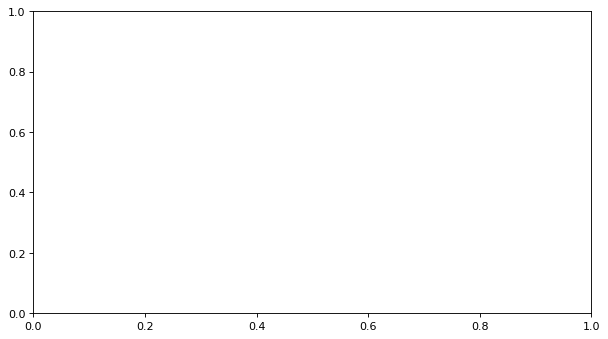

In [332]:
pl.figure(figsize=(9, 5), dpi=80)
pl.subplot(111)

pl.plot(out.x, out['qdA'],'--',linewidth=3, label='quad detector A')
pl.plot(out.x, out['qdP'],'--',linewidth=3, label='quad detector P')

pl.xlim(out.x.min(),out.x.max())

pl.xlabel("Phase [Degrees]",fontsize=15)
pl.ylabel("Strain sensitivity [$1/\\sqrt{\mathrm{Hz}}$]",fontsize=15)

###Main plot formatting
pl.tick_params(labelsize=20)
pl.tick_params(which='both', width=2)
pl.tick_params(which='major', length=7)
pl.tick_params(which='minor', length=4)
pl.grid(True, zorder=-1)
pl.legend(fontsize=12)

pl.show()

In [ ]:
pl.figure(figsize=(9, 5), dpi=80)
pl.subplot(111)

pl.plot(out.x, np.abs(out['sdin']),'--',linewidth=3, label='sqz detector in')
pl.plot(out.x, np.abs(out['sdout']),'--',linewidth=3, label='sqz detector out')

pl.xlim(out.x.min(),out.x.max())

pl.xlabel("Phase [Degrees]",fontsize=15)
pl.ylabel("Abs",fontsize=15)

###Main plot formatting
pl.tick_params(labelsize=20)
pl.tick_params(which='both', width=2)
pl.tick_params(which='major', length=7)
pl.tick_params(which='minor', length=4)
pl.grid(True, zorder=-1)
pl.legend(fontsize=20)

pl.show()

In [ ]:
fig = pl.figure(figsize=(9, 5), dpi=80)
ax = fig.add_subplot(111)
ax.plot(out.x, np.abs(out['sdin']), label = 'sdin abs')
ax.plot(out.x, np.abs(out['sdout']),label = 'sdout abs')

ax2 = ax.twinx()
ax2.plot(out.x, np.angle(out['sdin']), '--', label = 'sdin phase')
ax2.plot(out.x, np.angle(out['sdout']), '--', label = 'sdout phase')

pl.legend(loc=0)
ax.grid()
pl.show()

In [ ]:
pl.figure(figsize=(9, 5), dpi=80)
pl.subplot(111)

pl.plot(out.x, out['sqzd_noise'],'--',linewidth=3, label='sqzd out')
pl.plot(out.x, out['shot_noise'],'--',linewidth=3, label='shot out')

pl.xlim(out.x.min(),out.x.max())

pl.xlabel("Phase [Degrees]",fontsize=15)
pl.ylabel("Abs",fontsize=15)

###Main plot formatting
pl.tick_params(labelsize=20)
pl.tick_params(which='both', width=2)
pl.tick_params(which='major', length=7)
pl.tick_params(which='minor', length=4)
pl.grid(True, zorder=-1)
pl.legend(fontsize=20)

pl.show()

In [ ]:
pl.figure(figsize=(9, 5), dpi=80)
pl.subplot(111)

pl.plot(out.x, out['pdin'],'--',linewidth=3, label='pd detector in')
pl.plot(out.x, out['pdout'],'--',linewidth=3, label='pd detector out')


pl.xlim(out.x.min(),out.x.max())

pl.xlabel("Phase [Degrees]",fontsize=15)
pl.ylabel("Strain sensitivity [$1/\\sqrt{\mathrm{Hz}}$]",fontsize=15)

###Main plot formatting
pl.tick_params(labelsize=20)
pl.tick_params(which='both', width=2)
pl.tick_params(which='major', length=7)
pl.tick_params(which='minor', length=4)
pl.grid(True, zorder=-1)
pl.legend(fontsize=20)

pl.show()